# <span style="color:red;font-family:Helvetica">BIG MART SALES PREDICTION USING KNN ALGORITHM</span>

# Problem Statement

Make a machine learning model that predicts the Sales of particular item of a Big Mart.<br> 
It would be nice for the big mart to have a model which can predict the sales. This can help them to plan accordingly for a better service and profit. Some marts are also using this kind of model to estimete the sales

# About the Dataset

The Dataset contains the information of Outlets and items in the outlet such as:
* Item Identifier
* Item Fat Content
* Item Visibility
* Item Type
* Item MRP
* Item weight
* Outlet Identifier
* Outlet Type
* Outlet Location type
* Outlet Size
* Outlet Establishment Year
* Item Outlet Sales

# Attributes information 

* <span style="color:red"> Item_Identifier: </span>It is a unique identity for all items in superstore.
* <span style="color:red"> Item_Weight: </span>It is the weight of each item.
* <span style="color:red"> Item_Fat_Content: </span>It is the categorical column which tells whether the fat content in item is Low Fat, Regular, High Fat
* <span style="color:red"> Item_Visibility: </span>It tells about the visibility of the item.
* <span style="color:red"> Item_Type: </span>It is the Categorical column which describe the category of the item(Fruits and Vegetables, Snack Foods, Household, Frozen Foods, Dairy, Canned, Baking Goods, Health and Hygiene, Soft Drinks, Meat, Breads, Hard Drinks, Others, Starchy Foods, Breakfast, Seafood.
* <span style="color:red"> Item_MRP: </span>As the name tells, it is the MRP of each Item.
* <span style="color:red"> Outlet_Identifier: </span>It is the categorical column that has the unique identity of the each outlet.(OUT027, OUT013, OUT035, OUT049, OUT046, OUT045, OUT018, OUT017, OUT010, OUT019)
* <span style="color:red"> Outlet_Establishment_Year: </span>It is the Establishment year of the Outlet(1985, 1987, 2004, 1997, 1999, 2002, 2009, 2007, 1998)
* <span style="color:red"> Outlet_Size: </span>It is the categorical column which tells whether the size of Outlet is Small, Medium, Large.
* <span style="color:red"> Outlet_Location_Type: </span>Loacation is Tier1, Tier2, Tier3.
* <span style="color:red"> Outlet_Type: </span>It is the Type of the Outlet.(Supermarket Type1, Supermarket Type2, Supermarket Type3, Grocery Store)
* <span style="color:red"> Item_Outlet_Sales: </span>It is the Target column which describes the sale of the particular item in the Particualar Outlet.

# Libraries Used 

* Numpy
* Pandas
* Matplotlib
* Seaborn
* Sklearn

# CODE 

## Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_absolute_percentage_error as MAE

## Loading the Dataset 

In [2]:
df=pd.read_csv("Big_Mart.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Analyzing the data 

In [3]:
df.shape

(8523, 12)

In [4]:
df.size

102276

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Detecting & Treating the Missing Values

In [8]:
df.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
df["Item_Weight"].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
6.775      2
9.420      1
6.520      1
5.400      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [11]:
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0],inplace=True)
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)

In [12]:
df.isnull().sum().sum()

0

## Checking the Data types and Value counts

In [13]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [14]:
for i in df.columns:
    print("Data Type for",i,"is",df[i].dtype)
    print(df[i].value_counts())
    print(" ")
    print(" ")

Data Type for Item_Identifier is object
FDW13    10
FDG33    10
NCL31     9
FDD38     9
FDX31     9
         ..
FDO33     1
FDN52     1
FDY43     1
FDE52     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
 
 
Data Type for Item_Weight is float64
12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
5.735000        2
7.685000        1
9.420000        1
5.400000        1
6.520000        1
Name: Item_Weight, Length: 416, dtype: int64
 
 
Data Type for Item_Fat_Content is object
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
 
 
Data Type for Item_Visibility is float64
0.000000    526
0.076975      3
0.072238      2
0.080766      2
0.058543      2
           ... 
0.024343      1
0.041823      1
0.023154      1
0.047783      1
0.031007      1
Name: Item_Visibility, Length: 7880, dtype: int64
 
 
Data Type for Item_Type is object
Fruits and Vegetables  

In [15]:
def cols():
    
    obj_col=[]
    int_col=[]
    flt_col=[]
    
    columns=list(df.columns)
    
    for j in columns:
        if df[j].dtype=="object":
            obj_col.append(j)
            
        elif df[j].dtype=="int64":
            int_col.append(j)
        
        else: 
            flt_col.append(j)
    print("obj columns:",obj_col)
    print("flt columns:",flt_col)
    print("int columns:",int_col)

In [16]:
cols()

obj columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
flt columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
int columns: ['Outlet_Establishment_Year']


## Correcting the Data Type

In [17]:
df=df.astype({
    "Outlet_Establishment_Year":"object"
})

In [18]:
cols()

obj columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
flt columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
int columns: []


## Detecting Outliers 

<AxesSubplot:>

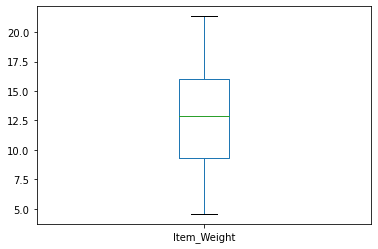

In [19]:
df["Item_Weight"].plot.box()

<AxesSubplot:>

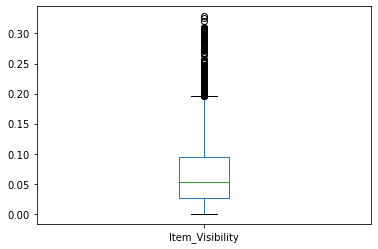

In [20]:
df["Item_Visibility"].plot.box()

<AxesSubplot:>

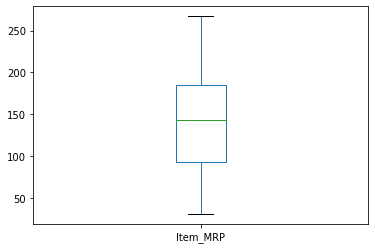

In [21]:
df["Item_MRP"].plot.box()

## Removing the Outliers 

<AxesSubplot:>

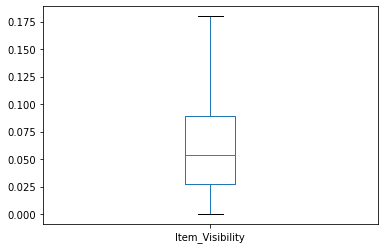

In [22]:
df.loc[df["Item_Visibility"]>0.18,"Item_Visibility"]=np.mean(df["Item_Visibility"])
df["Item_Visibility"].plot.box()

## Correcting the Spelling Errors

In [23]:
df["Item_Fat_Content"].replace({"reg":"Regular","LF":"Low Fat","low fat":"Low Fat"},inplace=True)
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [24]:
df["Item_Identifier"].nunique()

1559

## Deleting the Unnecessary Data

In [25]:
df = df.drop("Item_Identifier",axis=1)
df.shape

(8523, 11)

In [26]:
cols()

obj columns: ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
flt columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
int columns: []


## Visual Analysis

### Univariate Analysis

In [27]:
def univariate_analysis(i):
    if df[i].dtype=="object":
        kind= input("Pie chart or Bar Garph: ")
        print(df[i].value_counts()/len(df)*100)
        print(" ")
        plt.title(i)
        (df[i].value_counts()/len(df)*100).plot(kind=kind)
    else:
        plt.title(i)
        df[i].plot.hist()

Pie chart or Bar Garph: bar
Low Fat    64.730729
Regular    35.269271
Name: Item_Fat_Content, dtype: float64
 


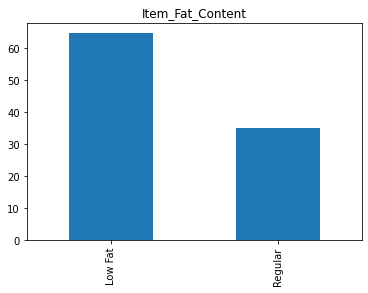

In [28]:
univariate_analysis("Item_Fat_Content")

Pie chart or Bar Garph: bar
Fruits and Vegetables    14.455004
Snack Foods              14.079549
Household                10.676992
Frozen Foods             10.043412
Dairy                     8.001877
Canned                    7.614690
Baking Goods              7.602957
Health and Hygiene        6.101138
Soft Drinks               5.221166
Meat                      4.986507
Breads                    2.944972
Hard Drinks               2.510853
Others                    1.982870
Starchy Foods             1.736478
Breakfast                 1.290625
Seafood                   0.750909
Name: Item_Type, dtype: float64
 


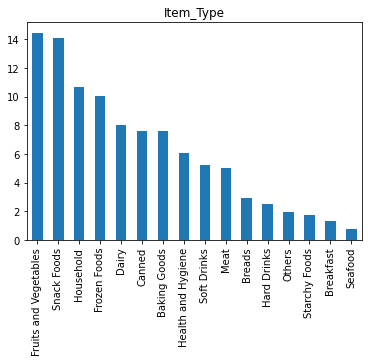

In [29]:
univariate_analysis("Item_Type")

Pie chart or Bar Garph: pie
OUT027    10.970316
OUT013    10.935117
OUT049    10.911651
OUT046    10.911651
OUT035    10.911651
OUT045    10.899918
OUT018    10.888185
OUT017    10.864719
OUT010     6.511792
OUT019     6.195002
Name: Outlet_Identifier, dtype: float64
 


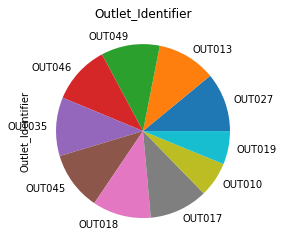

In [30]:
univariate_analysis("Outlet_Identifier")

Pie chart or Bar Garph: bar
1985    17.165317
1987    10.935117
1997    10.911651
1999    10.911651
2004    10.911651
2002    10.899918
2009    10.888185
2007    10.864719
1998     6.511792
Name: Outlet_Establishment_Year, dtype: float64
 


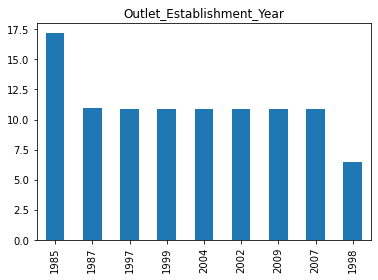

In [31]:
univariate_analysis("Outlet_Establishment_Year")

Pie chart or Bar Garph: bar
Medium    61.046580
Small     28.018303
High      10.935117
Name: Outlet_Size, dtype: float64
 


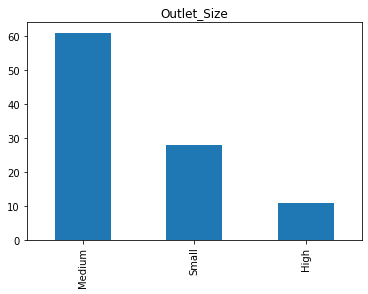

In [32]:
univariate_analysis("Outlet_Size")

Pie chart or Bar Garph: pie
Tier 3    39.305409
Tier 2    32.676288
Tier 1    28.018303
Name: Outlet_Location_Type, dtype: float64
 


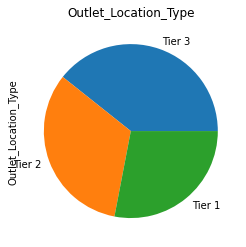

In [33]:
univariate_analysis("Outlet_Location_Type")

Pie chart or Bar Garph: pie
Supermarket Type1    65.434706
Grocery Store        12.706793
Supermarket Type3    10.970316
Supermarket Type2    10.888185
Name: Outlet_Type, dtype: float64
 


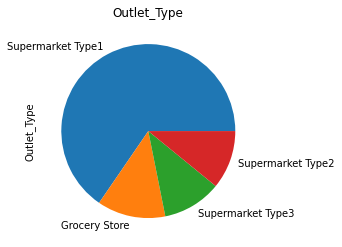

In [34]:
univariate_analysis("Outlet_Type")

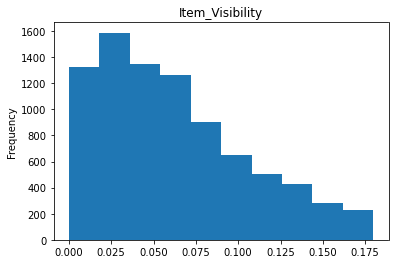

In [35]:
univariate_analysis("Item_Visibility")

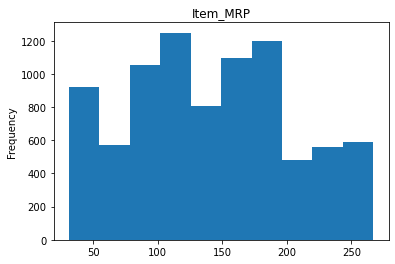

In [36]:
univariate_analysis("Item_MRP")

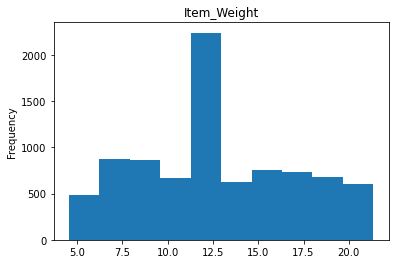

In [37]:
univariate_analysis("Item_Weight")

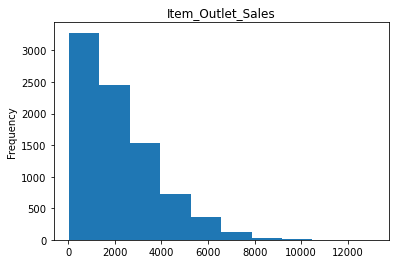

In [38]:
univariate_analysis("Item_Outlet_Sales")

## Bivariate Analysis

In [39]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.005258,0.024756,0.011550
Item_Visibility,-0.005258,1.000000,0.002565,-0.063751
Item_MRP,0.024756,0.002565,1.000000,0.567574
Item_Outlet_Sales,0.011550,-0.063751,0.567574,1.000000


In [40]:
def bivariate_analysis(i,j):
    
    if df[i].dtype==df[j].dtype=="float64":
        
        kind = input("What kind of plot? ")
        
        if kind == "displot" :
            kde = input("Kind = kde ? ")
            if kde == "yes":
                sns.displot(df, x = i, y = j,kind="kde")
            else:
                sns.displot(df, x = i, y = j,cbar=True)
        
        
        elif kind == "jointplot" :
            kde = input("Kind = kde ? ")
            if kde == "yes":
                sns.jointplot(data=df, x = i, y = j, kind="kde")
            else:
                sns.jointplot(data=df, x = i, y = j)
        
        
        else:
            g = sns.JointGrid(data=df, x=i, y=j)
            g.plot_joint(sns.histplot)
            g.plot_marginals(sns.boxplot)
    
    elif df[i].dtype==df[j].dtype=="object":
        plt.figure(figsize = (24,7))
        sns.countplot(x=df[i],hue = df[j])
    
    else:
        kind = input("What kind of plot?")
        sns.catplot(x=i, y=j,kind=kind,data=df,height=5,aspect=4)

What kind of plot? displot
Kind = kde ? yes


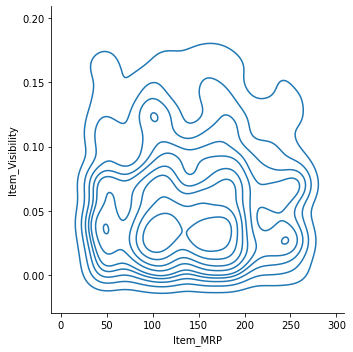

In [41]:
bivariate_analysis("Item_MRP","Item_Visibility")

What kind of plot? displot
Kind = kde ? no


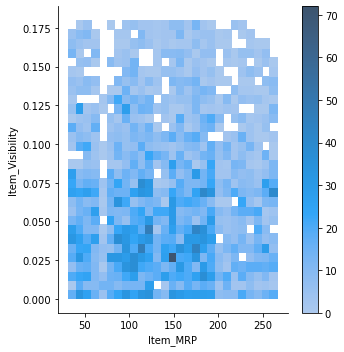

In [42]:
bivariate_analysis("Item_MRP","Item_Visibility")

What kind of plot? jointplot
Kind = kde ? no


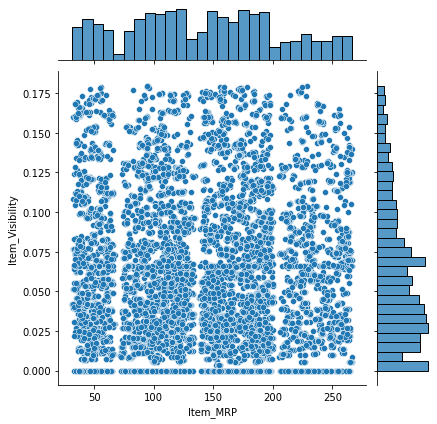

In [43]:
bivariate_analysis("Item_MRP","Item_Visibility")

What kind of plot? jointplot
Kind = kde ? yes


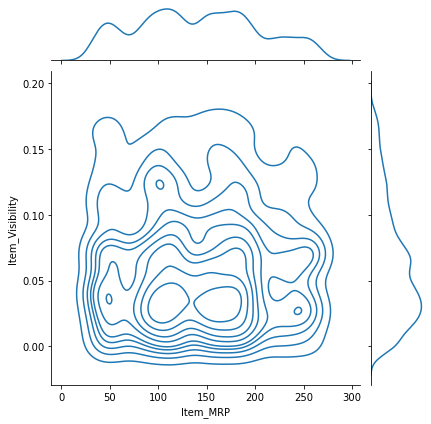

In [44]:
bivariate_analysis("Item_MRP","Item_Visibility")

What kind of plot? jointgrid


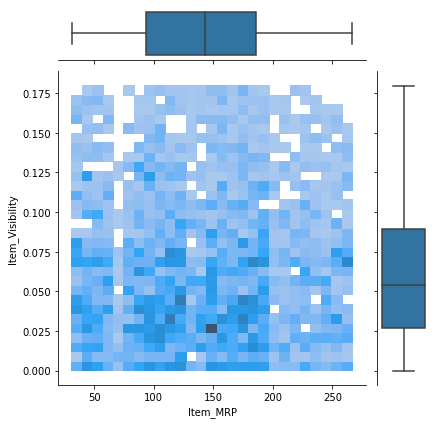

In [45]:
bivariate_analysis("Item_MRP","Item_Visibility")

What kind of plot? displot
Kind = kde ? no


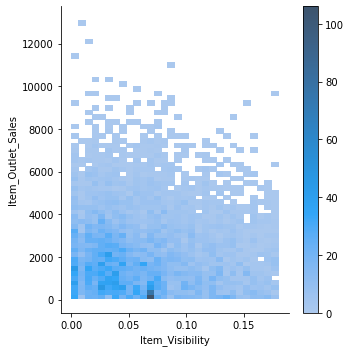

In [46]:
bivariate_analysis("Item_Visibility","Item_Outlet_Sales")

What kind of plot? displot
Kind = kde ? yes


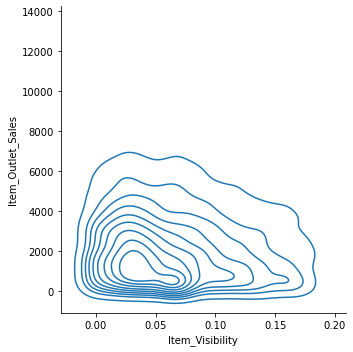

In [47]:
bivariate_analysis("Item_Visibility","Item_Outlet_Sales")

What kind of plot? jointplot
Kind = kde ? yes


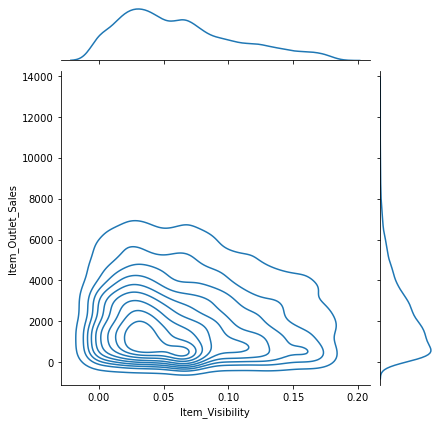

In [48]:
bivariate_analysis("Item_Visibility","Item_Outlet_Sales")

What kind of plot? jointplot
Kind = kde ? no


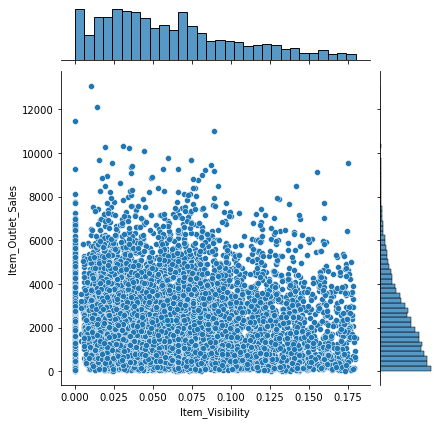

In [49]:
bivariate_analysis("Item_Visibility","Item_Outlet_Sales")

What kind of plot? jointgrid


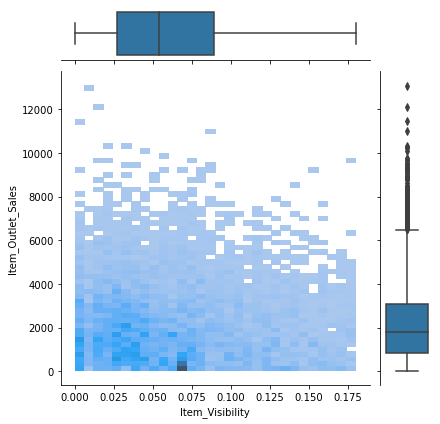

In [50]:
bivariate_analysis("Item_Visibility","Item_Outlet_Sales")

What kind of plot? jointplot
Kind = kde ? no


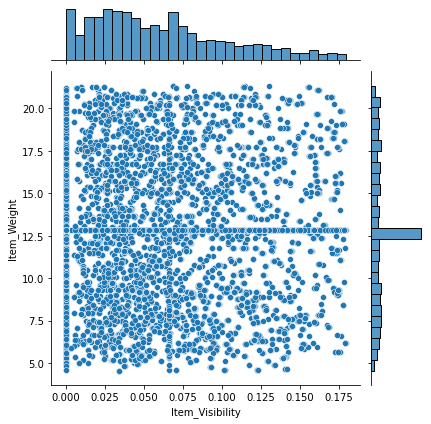

In [51]:
bivariate_analysis("Item_Visibility","Item_Weight")

What kind of plot? jointplot
Kind = kde ? no


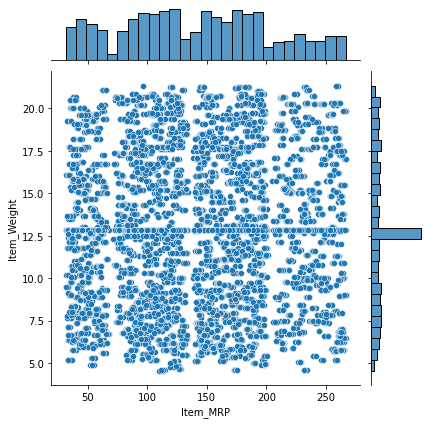

In [52]:
bivariate_analysis("Item_MRP","Item_Weight")

What kind of plot? jointgrid


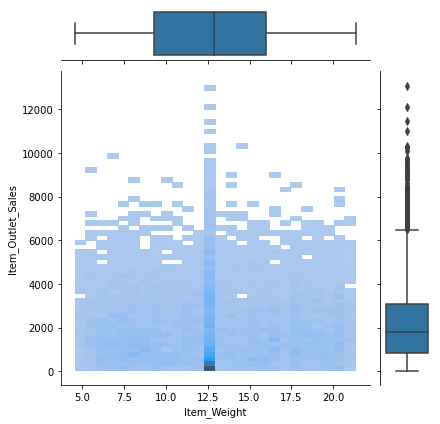

In [53]:
bivariate_analysis("Item_Weight","Item_Outlet_Sales")

What kind of plot? displot
Kind = kde ? no


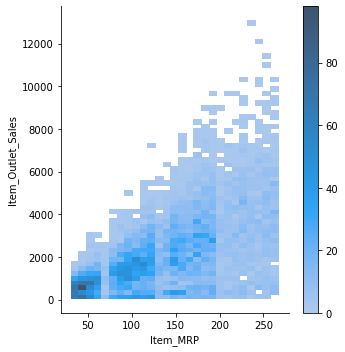

In [54]:
bivariate_analysis("Item_MRP","Item_Outlet_Sales")

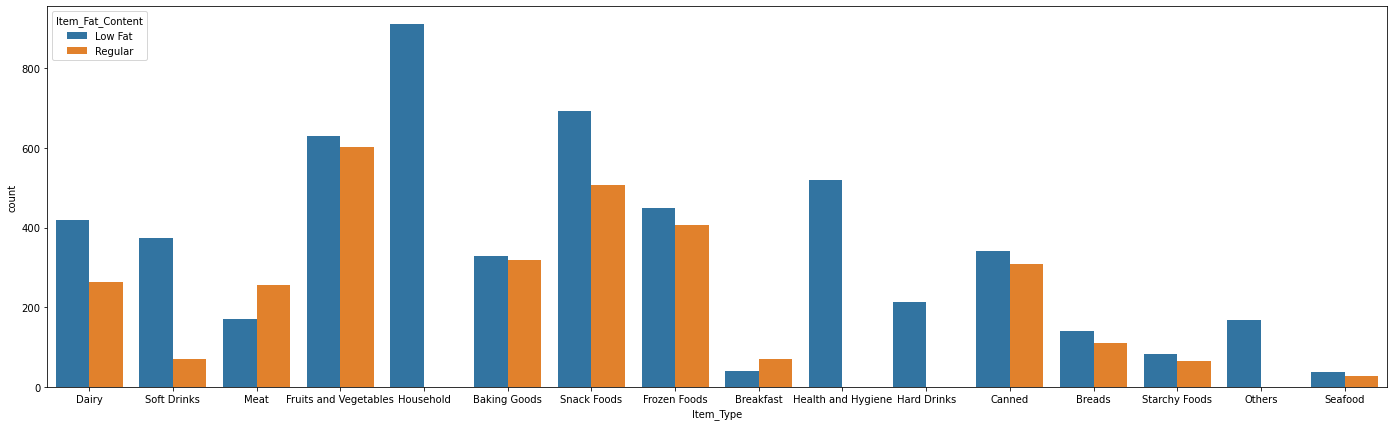

In [55]:
bivariate_analysis("Item_Type","Item_Fat_Content")

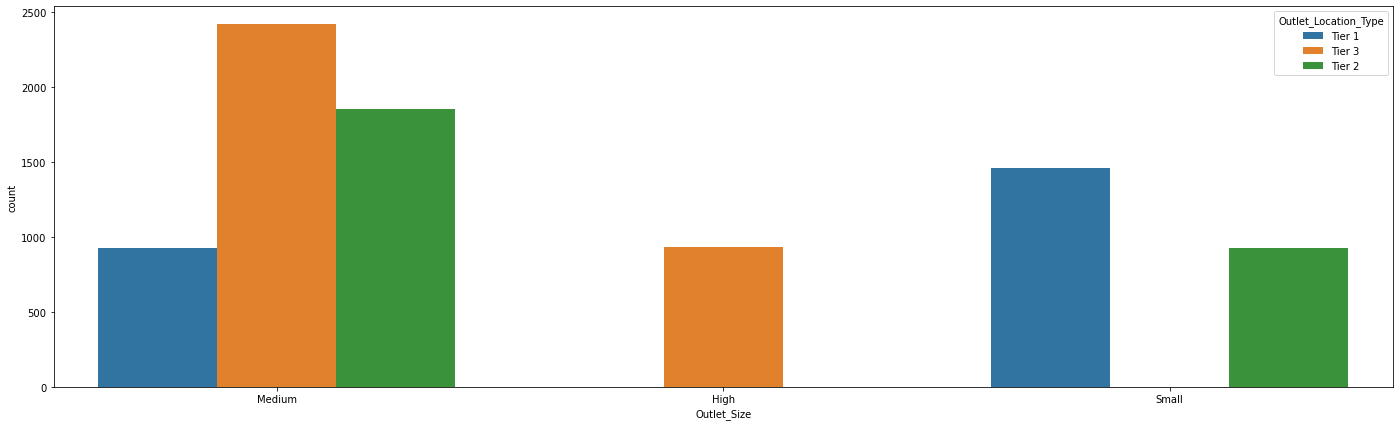

In [56]:
bivariate_analysis("Outlet_Size","Outlet_Location_Type")

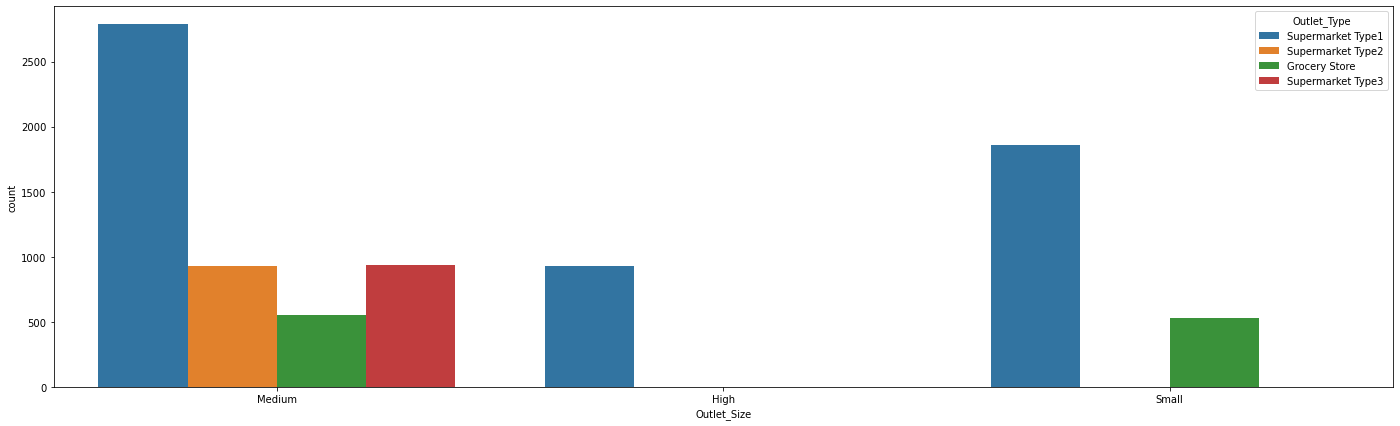

In [57]:
bivariate_analysis("Outlet_Size","Outlet_Type")

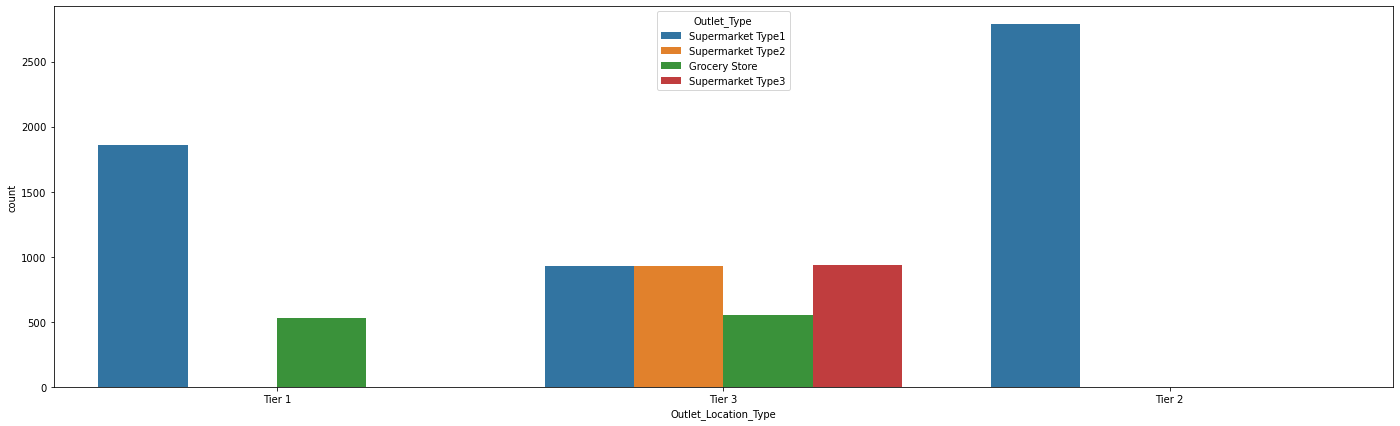

In [58]:
bivariate_analysis("Outlet_Location_Type","Outlet_Type")

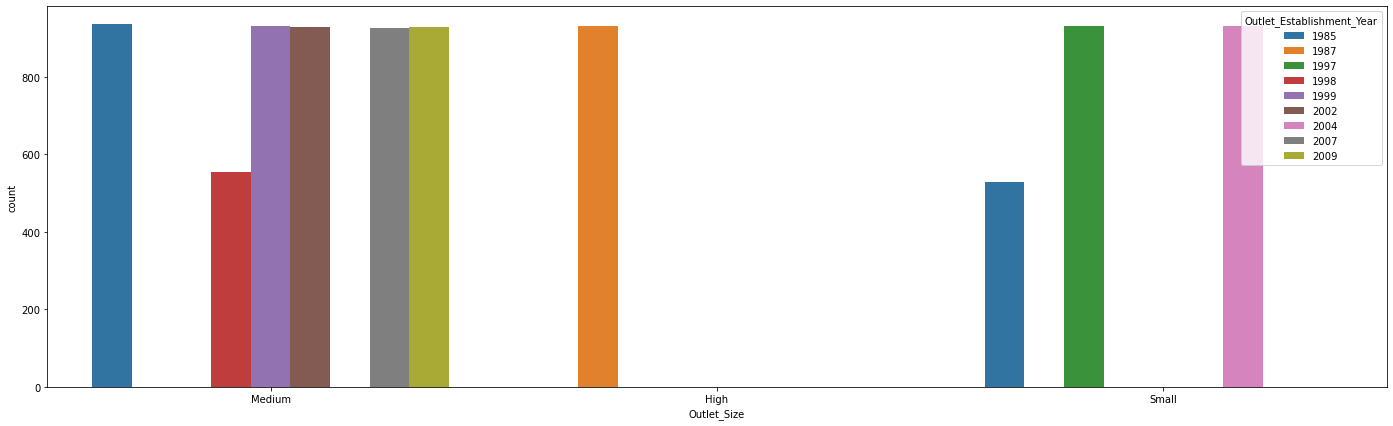

In [59]:
bivariate_analysis("Outlet_Size","Outlet_Establishment_Year")

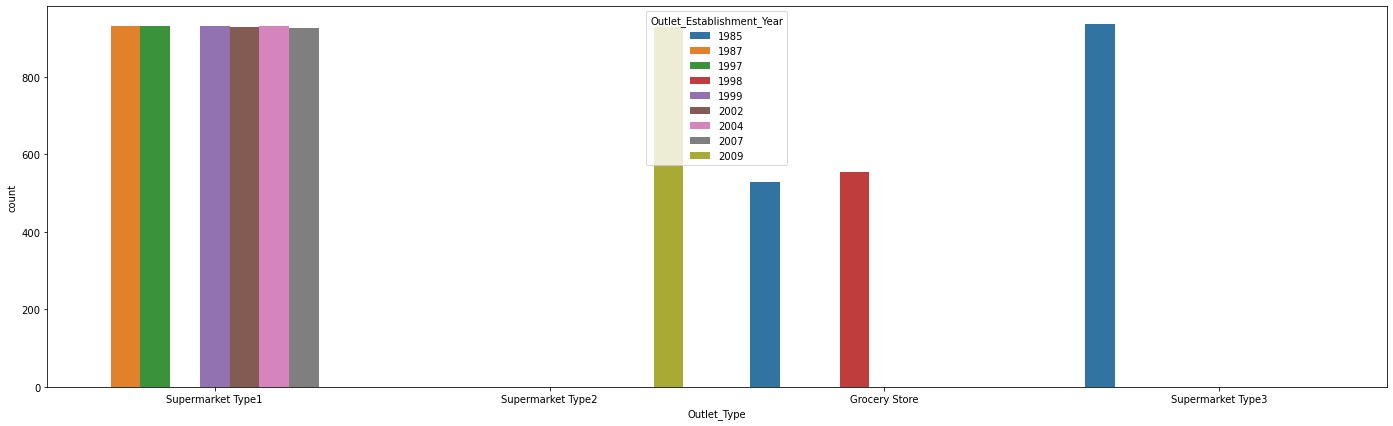

In [60]:
bivariate_analysis("Outlet_Type","Outlet_Establishment_Year")

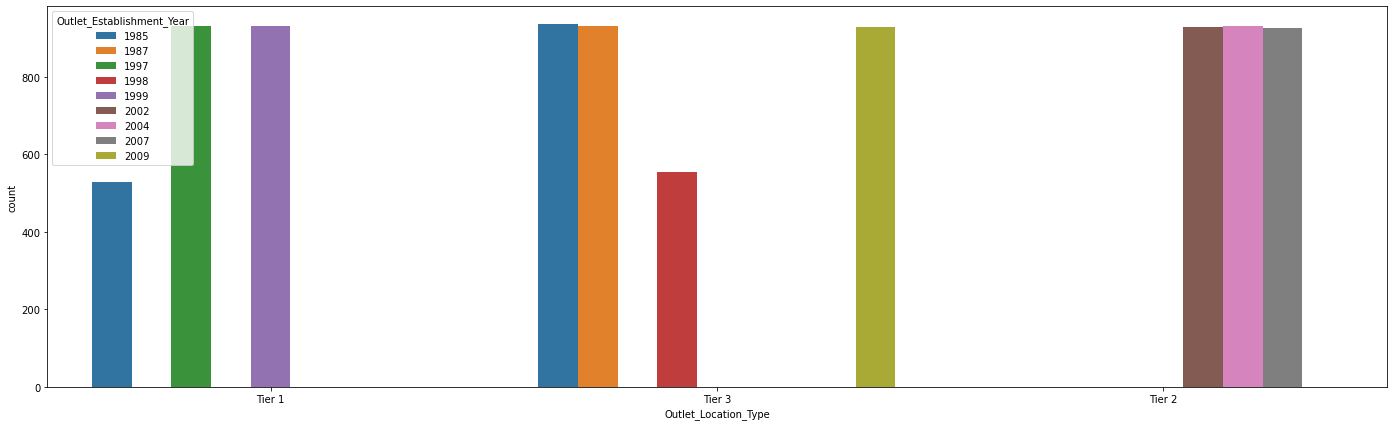

In [61]:
bivariate_analysis("Outlet_Location_Type","Outlet_Establishment_Year")

What kind of plot?bar


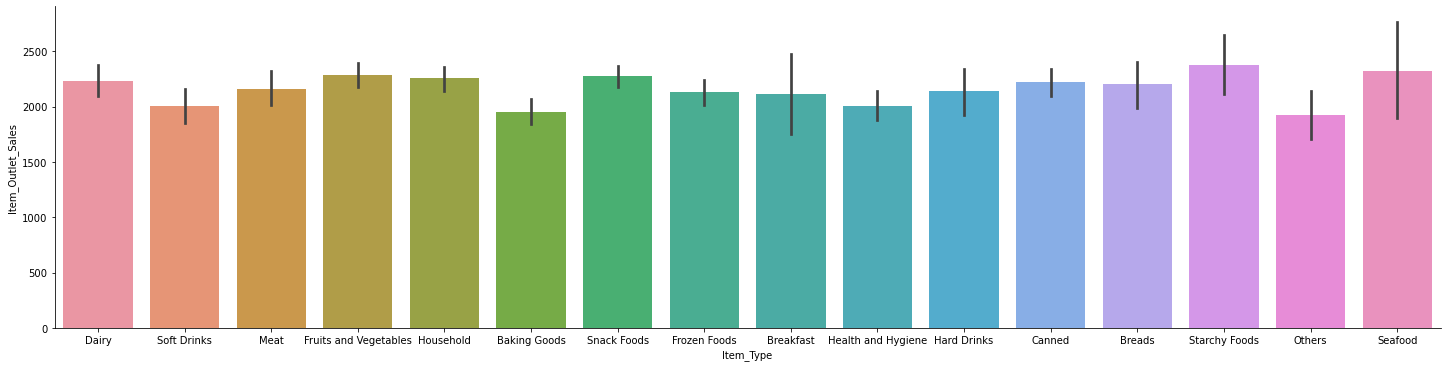

In [62]:
bivariate_analysis("Item_Type","Item_Outlet_Sales")

What kind of plot?box


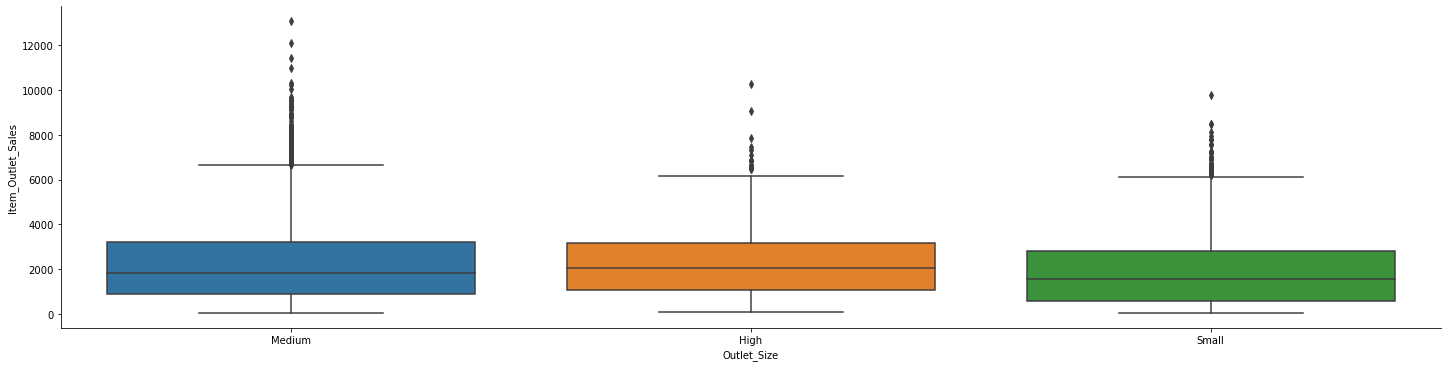

In [63]:
bivariate_analysis("Outlet_Size","Item_Outlet_Sales")

What kind of plot?boxen


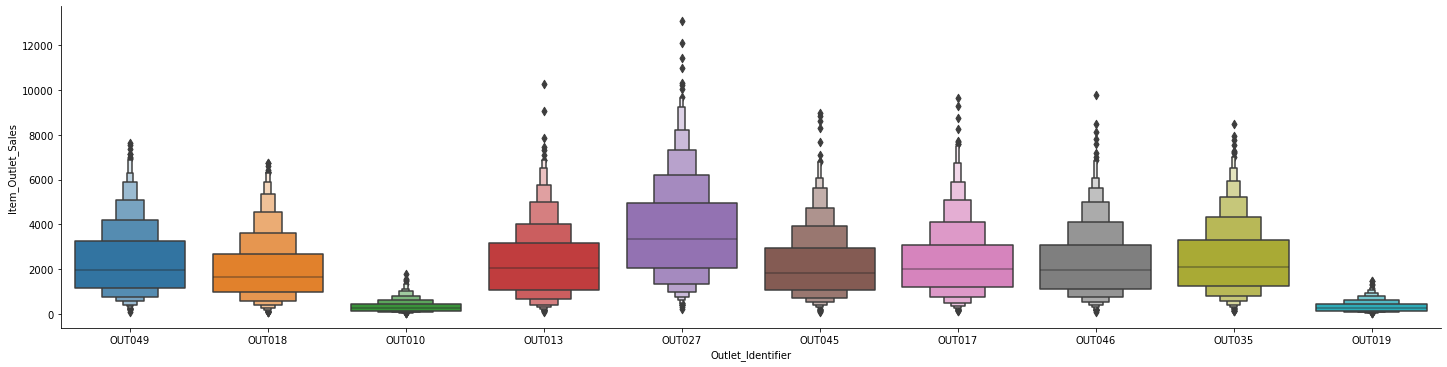

In [64]:
bivariate_analysis("Outlet_Identifier","Item_Outlet_Sales")

What kind of plot?violin


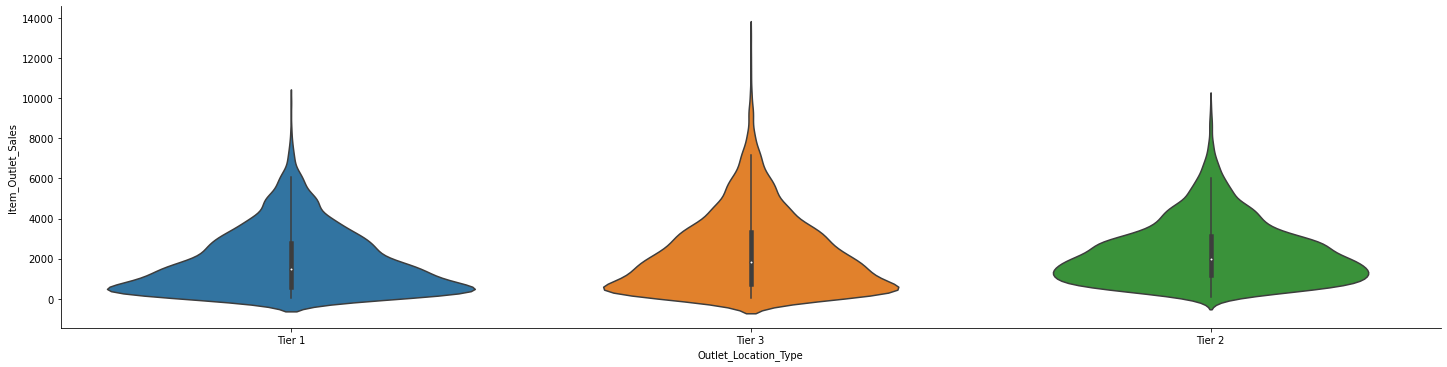

In [65]:
bivariate_analysis("Outlet_Location_Type","Item_Outlet_Sales")

What kind of plot?boxen


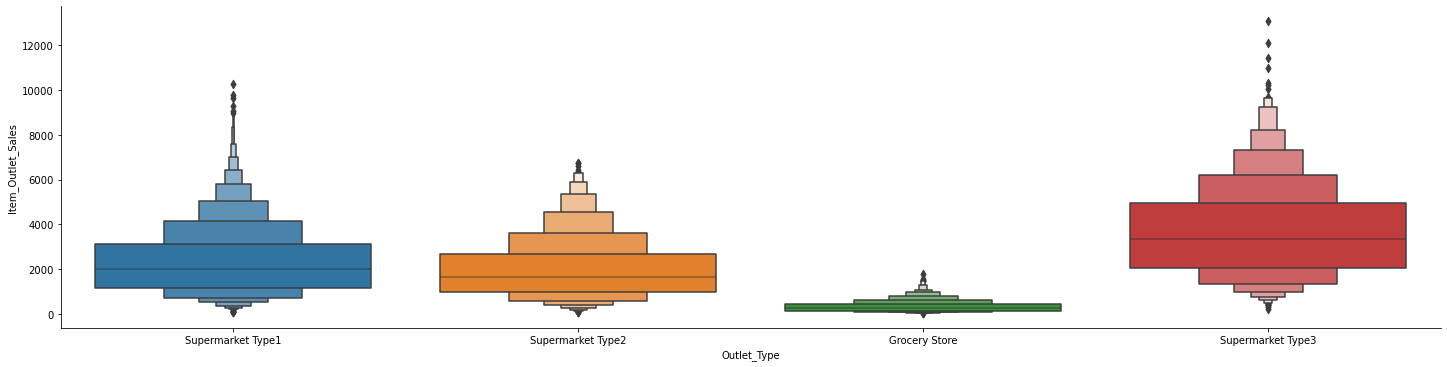

In [66]:
bivariate_analysis("Outlet_Type","Item_Outlet_Sales")

What kind of plot?bar


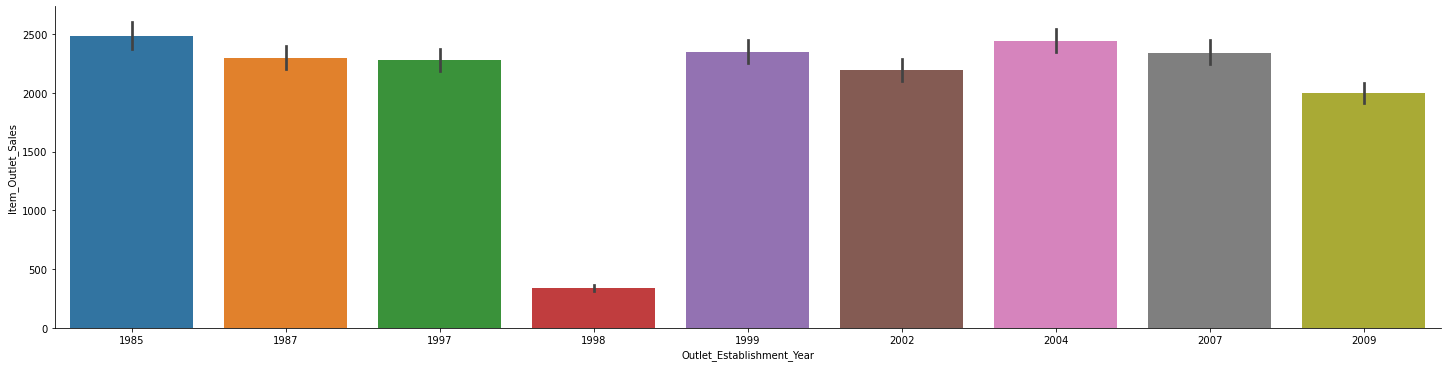

In [67]:
bivariate_analysis("Outlet_Establishment_Year","Item_Outlet_Sales")

## Creating the Dummy Variables 

In [68]:
df = pd.get_dummies(df)
df.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300000,0.016047,249.8092,3735.1380,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920000,0.019278,48.2692,443.4228,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500000,0.016760,141.6180,2097.2700,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200000,0.000000,182.0950,732.3800,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.930000,0.000000,53.8614,994.7052,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
5,10.395000,0.000000,51.4008,556.6088,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6,13.650000,0.012741,57.6588,343.5528,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
7,12.857645,0.127470,107.7622,4022.7636,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
8,16.200000,0.016687,96.9726,1076.5986,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
9,19.200000,0.094450,187.8214,4710.5350,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


## Separating the Features & Target

In [69]:
x=df.drop("Item_Outlet_Sales",axis=1)
y=df["Item_Outlet_Sales"]
print("shape of x",x.shape)
print("shape of y",y.shape)

shape of x (8523, 50)
shape of y (8523,)


## Normalizing the Data 

In [70]:
scaler=MinMaxScaler()
xscaled=scaler.fit_transform(x)
x = pd.DataFrame(xscaled,columns=x.columns)
x.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.089247,0.927507,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.081274,0.107216,0.072068,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.770765,0.093211,0.468288,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.871986,0.000000,0.640093,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.260494,0.000000,0.095805,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0.347723,0.000000,0.085361,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,0.541530,0.070860,0.111923,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,0.494352,0.708926,0.324587,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,0.693361,0.092806,0.278791,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,0.871986,0.525283,0.664399,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Splitting the data into Train & Test Set

In [71]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=50,test_size=0.2)

## Making the Elbow curve to decide the right value of n-neighbours to make the KNN Regressor

In [73]:
def elbow(k):
    
    Error=[]
    
    for i in k:
        
        reg = KNN(n_neighbors=i)
        reg.fit(xtrain,ytrain)
        
        temp_pred = reg.predict(xtest)
        Error.append(MAE(temp_pred,ytest))
    
    return(Error)

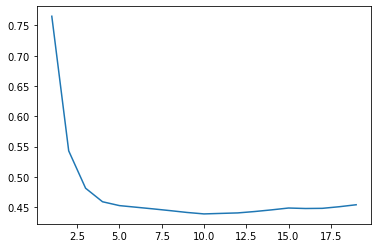

In [74]:
k = range(1,20,1)
elbow(k)
plt.plot(k,elbow(k))

## Fitting the Model taking N=10

In [75]:
reg = KNN(n_neighbors=10)
reg.fit(xtrain,ytrain)

prediction = reg.predict(xtest)

Error=MAE(prediction,ytest)
print(Error)

0.4389618648184984


# MODEL IS COMPLETED